In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
warnings.filterwarnings("ignore")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head()

In [ ]:
df.info()

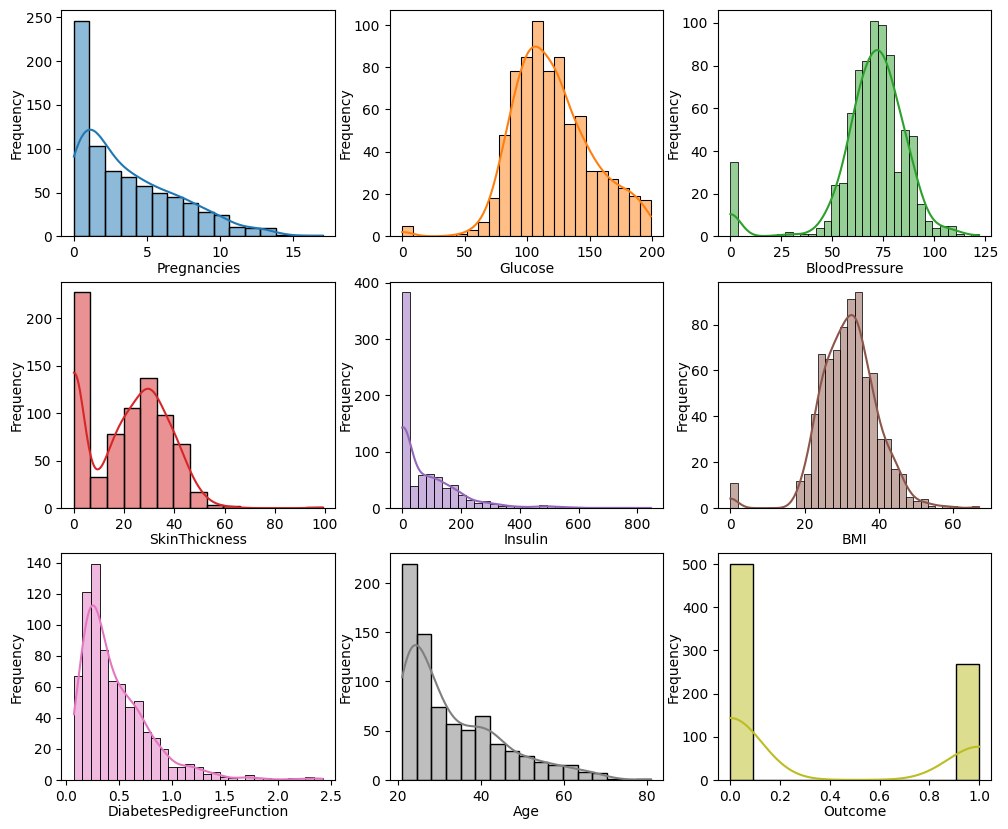

In [99]:
colors = sns.color_palette("tab10")
fig, ax = plt.subplots(3,3, figsize = (12,10))
for col, axes, color in zip(df.columns, ax.reshape(-1), colors[:9]):
    sns.histplot(data = df, x = col, ax = axes, kde = True, color = color)
    axes.set_ylabel('Frequency', labelpad = 1.0)
    axes.set_xlabel(col, labelpad = 1.0)
plt.show()

In [ ]:
df.describe()

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot = True, fmt = '0.1f', cmap = 'coolwarm')

In [ ]:
X = df.drop(columns = 'Outcome')
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
parameters = {
    'penalty':('l1', 'l2', 'elasticnet'),
    'C': [0.5, 1.0, 1.5, 2.0],
    'class_weight': ('balanced', 'None'),
}

In [ ]:
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters)
clf.fit(X_train, y_train)

In [ ]:
print(f"Best parameters: {clf.best_params_}")

In [ ]:
print(classification_report(clf.predict(X_test), y_test))

In [ ]:
cm = confusion_matrix(clf.predict(X_test), y_test)
sns.heatmap(cm, annot = True)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')  
plt.title('Confusion Matrix For The Logistic Regression Model With The Best Parameters')
plt.show()